# Importing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
#Naive bayes
from sklearn.naive_bayes import GaussianNB
#Stacking
from mlxtend.classifier import StackingClassifier

In [3]:
df.isnull().sum().sort_values(ascending =False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
Timestamp                       0
wellness_program                0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
Country                         0
Gender                          0
care_options                    0
dtype: int64

In [2]:
df=pd.read_csv("survey(mental heath data).csv")

In [4]:
df.head(2)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN


In [5]:
df.shape

(1259, 27)

### Total Number of columns in dataframe = 27

In [6]:
df.columns[2:]

Index(['Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [7]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [9]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

In [10]:
#dealing with missing data
df.drop(['comments'], axis= 1, inplace=True)
df.drop(['state'], axis= 1, inplace=True)
df.drop(['Timestamp'], axis= 1, inplace=True)
df.isnull().sum().max() #just checking that there's no missing data missing...
df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [11]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0
# Create lists by data tpe
intFeatures = ['Age']
floatFeatures = []
stringFeatures=df.columns[1:]
# Clean the NaN's
for feature in df:
    if feature in intFeatures:
        df[feature] = df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        df[feature] = df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        df[feature] = df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not identified.' % feature)
df.head()


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [12]:
#Clean 'Gender'
gender = df['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [13]:
male=['M' ,'Male', 'male', 'm','Male-ish','Male ' ,'maile','something kinda male?','Cis Male' ,'Mal','Male (CIS)','Make','Man' ,'msle' ,'Mail' ,'cis male' ,'Guy (-ish) ^_^' ,'male leaning androgynous','Malr','Cis Man' ]
female=['Female', 'female'  ,'Cis Female', 'F' , 'Woman', 'f' , 'queer/she/they', 'Femake', 'woman','Female '  ,'cis-female/femme' ,'Female (cis)'  ,'A little about you' ,'p' ,'femail' ]
trans=['Trans-female','Trans-female','non-binary' ,'Nah', 'All' ,'Enby', 'fluid', 'Genderqueer','Androgyne' ,'Agender' ,'Trans woman' ,'Neuter','Female (trans)' ,'queer' , 'ostensibly male, unsure what that really means']
wrong=['A little about you' 'Malr' ,'p']


In [14]:
z=[]
for x in df['Gender']:
    for i in male:
        if x==i:    
            x='Male'
    for i in female:    
        if x == i:
            x='Female'
    for i in trans:
        if x == i:
            x='Trans'
    z.append(x)        


In [15]:
gen=pd.Series(z)

In [16]:
gen.unique()

array(['Female', 'Male', 'Trans'], dtype=object)

In [17]:
#Get rid of bullshit   
df['Gender']=gen
print(df['Gender'].unique())

['Female' 'Male' 'Trans']


In [18]:
#complete missing age with mean
df['Age'].fillna(df['Age'].mean(), inplace = True)
# Fill with media() values  120
s = pd.Series(df['Age'])
s[s<18] = df['Age'].median()
df['Age'] = s
s = pd.Series(df['Age'])
s[s>120] = df['Age'].max()
df['Age'] = s
#Ranges of Age
df['age_range'] = pd.cut(df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
df['self_employed'] = df['self_employed'].replace([defaultString], 'No')
print(df['self_employed'].unique())

['No' 'Yes']


In [19]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString
df['work_interfere'] = df['work_interfere'].replace([defaultString], 'Dont know' )
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' 'Dont know']


In [20]:
#Encoding data
labelDict = {}
for feature in df:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
for key, value in labelDict.items():
    print(key, value)

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72, 99999999999]
label_Gender ['Female', 'Male', 'Trans']
label_Country ['Australia', 'Austria', 'Bahamas, The', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ['Dont know', 'Never', 'Often', 'Rarely

In [21]:
#Get rid of 'Country'
df = df.drop(['Country'], axis= 1)
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [22]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

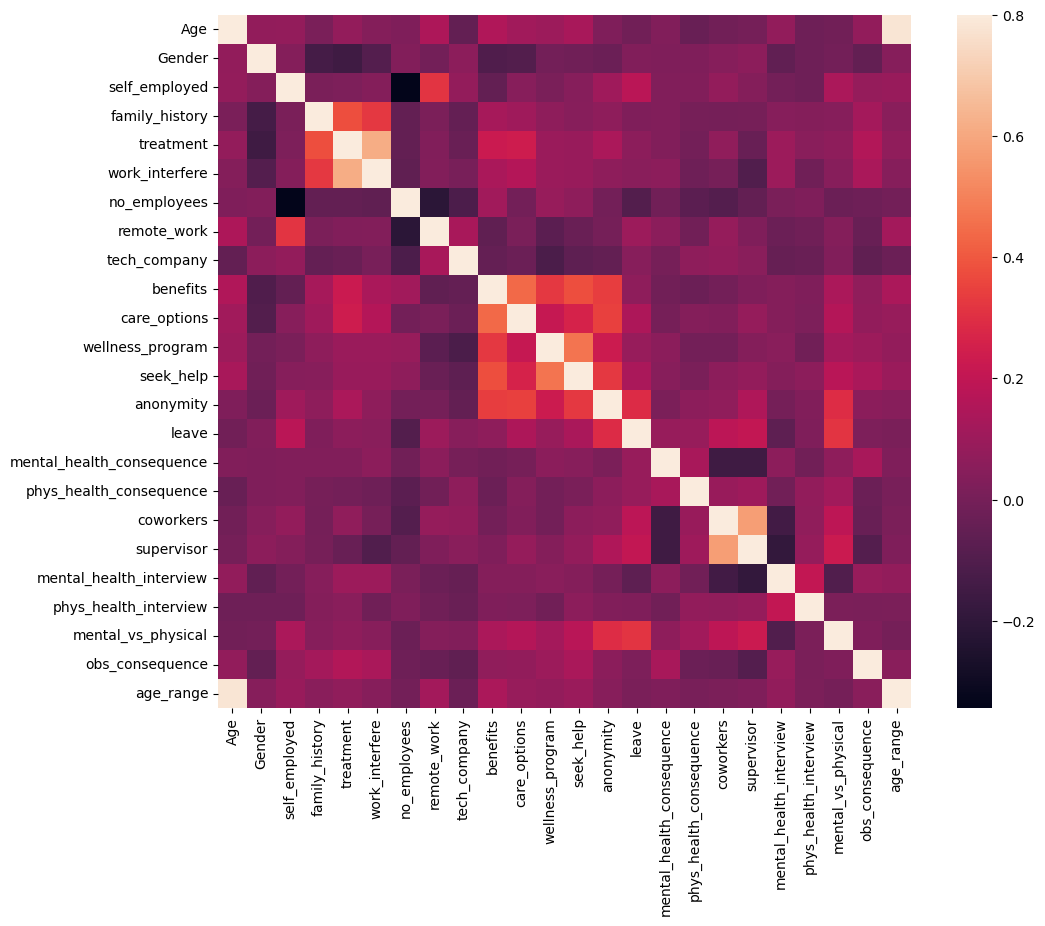

In [23]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()


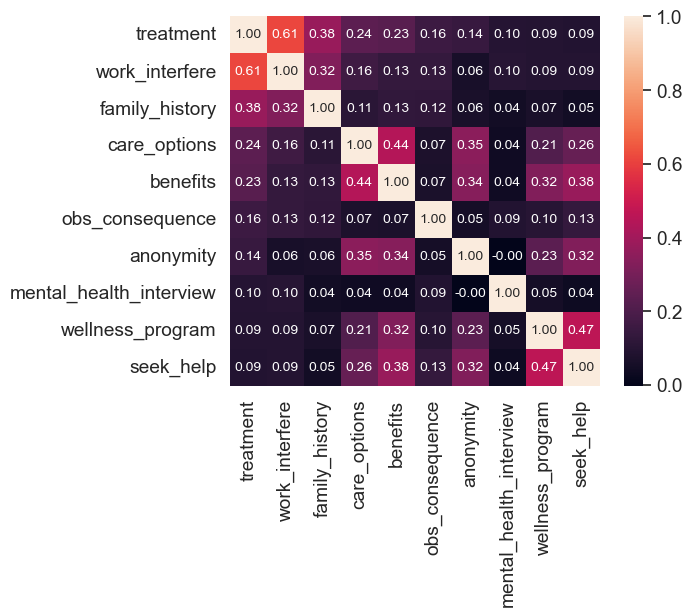

In [24]:
k = 10 
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\khant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

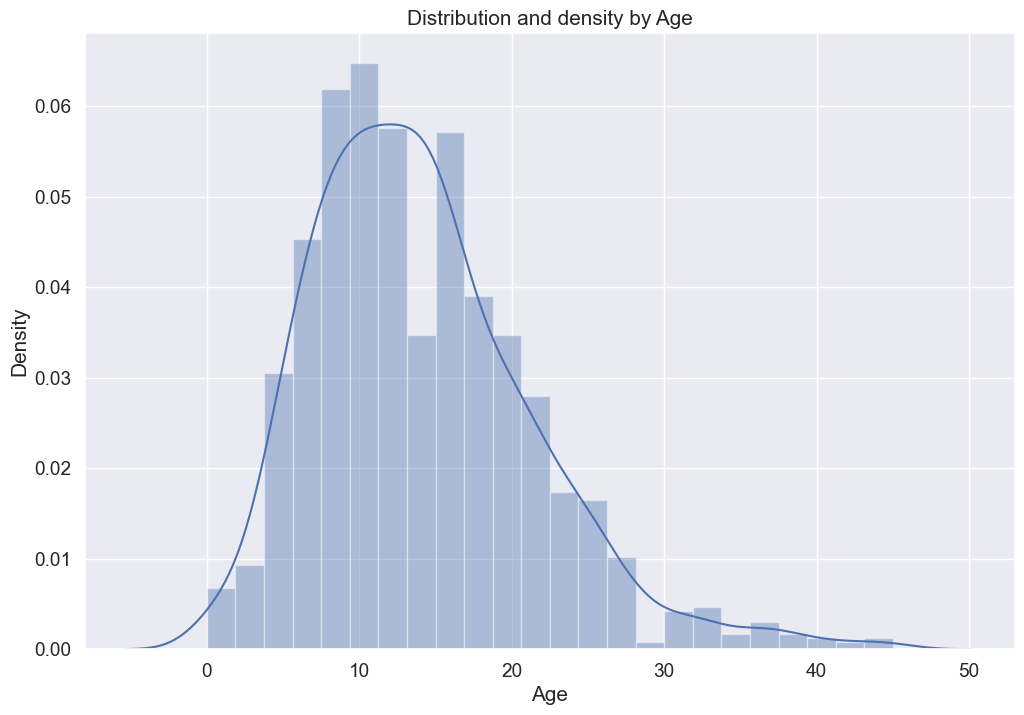

In [25]:
# Distribution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(df["Age"], bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")

C:\Users\khant\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\khant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\khant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


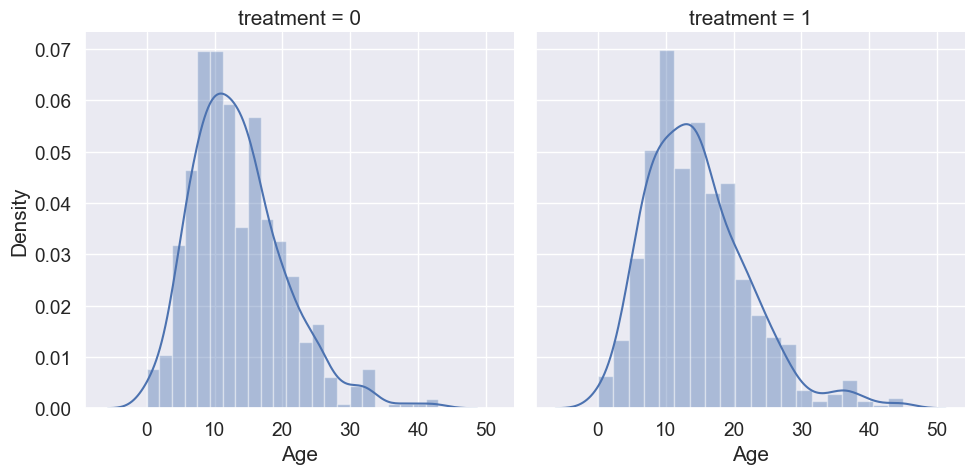

In [26]:
j = sns.FacetGrid(df, col='treatment', size=5)
j = j.map(sns.distplot, "Age")

Text(0.5, 1.0, 'Total Distribution by treated or not')

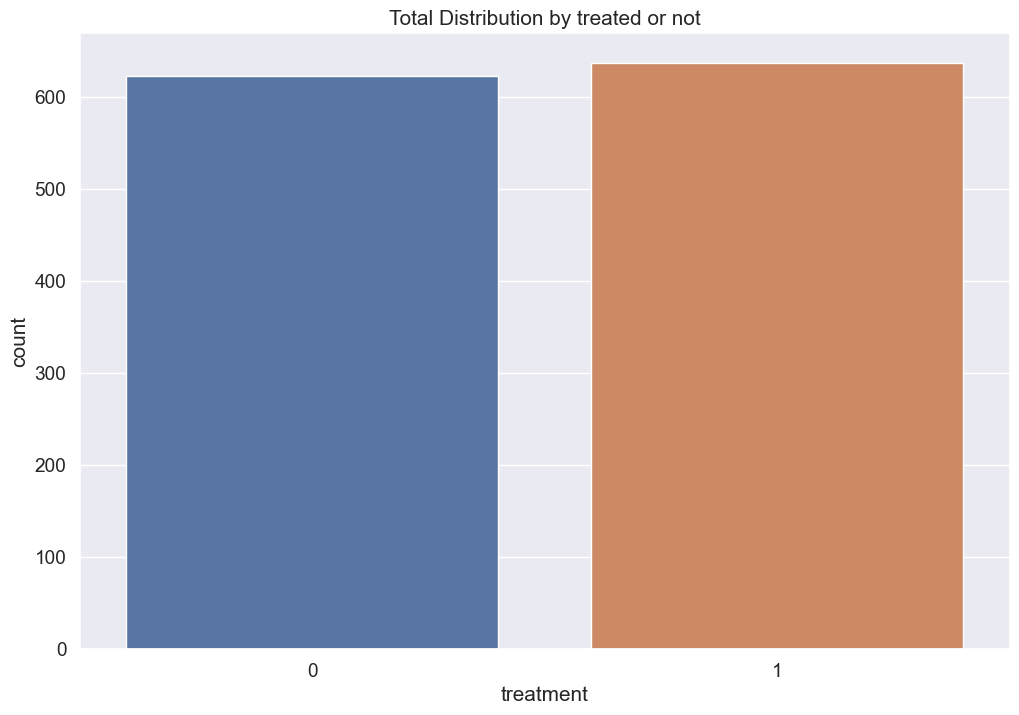

In [27]:
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
j = sns.countplot(x="treatment", data=df)

plt.title('Total Distribution by treated or not')

C:\Users\khant\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\khant\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


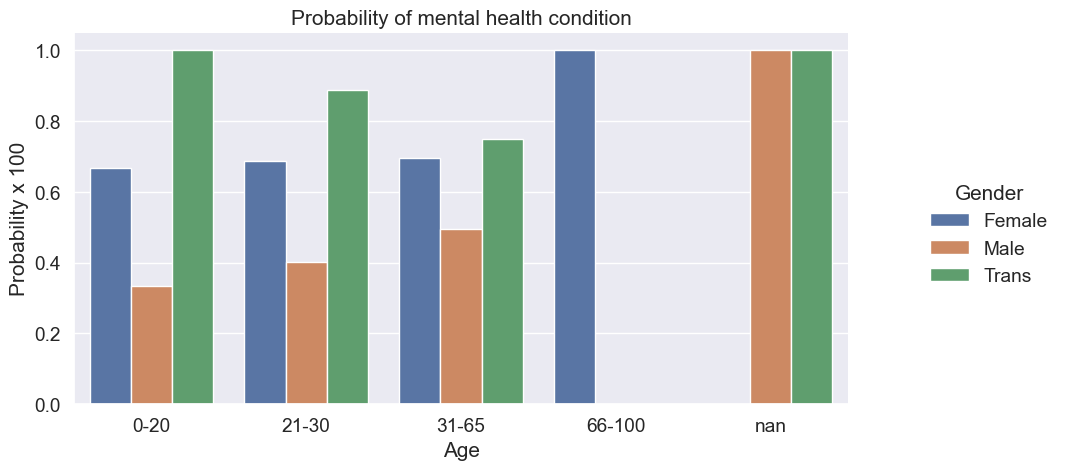

In [28]:
o = labelDict['label_age_range']
j = sns.factorplot(x="age_range", y="treatment", hue="Gender", data=df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True)
j.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
new_labels = labelDict['label_Gender']
for t, l in zip(j._legend.texts, new_labels): t.set_text(l)
j.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

C:\Users\khant\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\khant\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


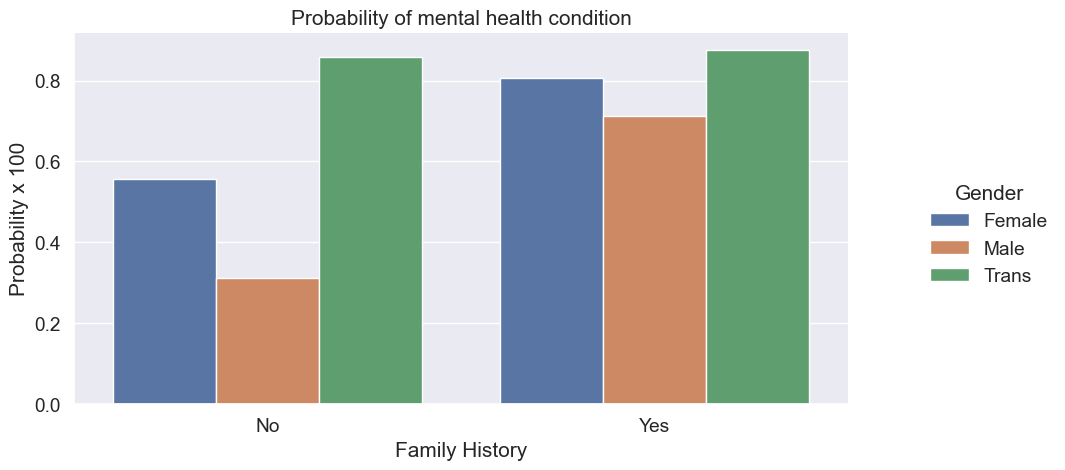

In [29]:
o = labelDict['label_family_history']
j = sns.factorplot(x="family_history", y="treatment", hue="Gender", data=df, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
j.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')
new_labels = labelDict['label_Gender']
for t, l in zip(j._legend.texts, new_labels): t.set_text(l)
j.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

C:\Users\khant\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\khant\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


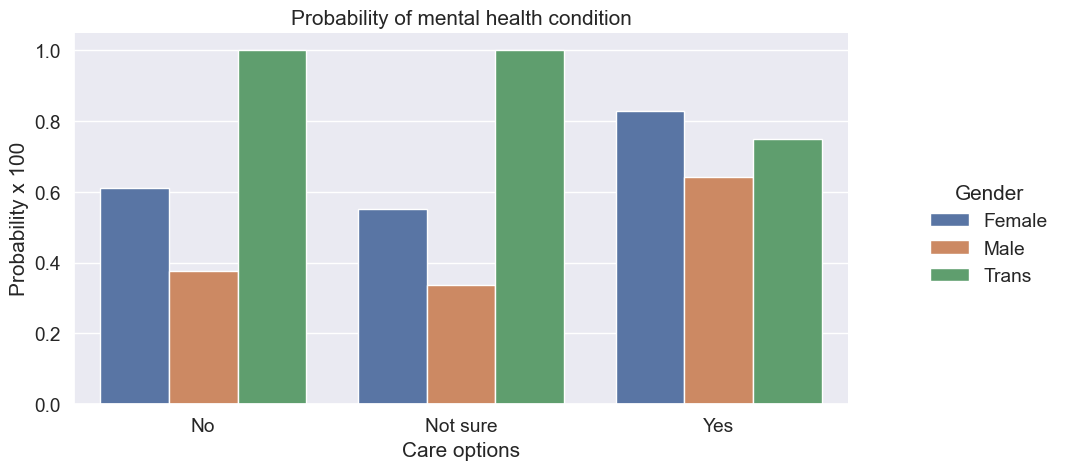

In [30]:
o = labelDict['label_care_options']
j = sns.factorplot(x="care_options", y="treatment", hue="Gender", data=df, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
j.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')
new_labels = labelDict['label_Gender']
for t, l in zip(j._legend.texts, new_labels): t.set_text(l)
j.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

C:\Users\khant\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\khant\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


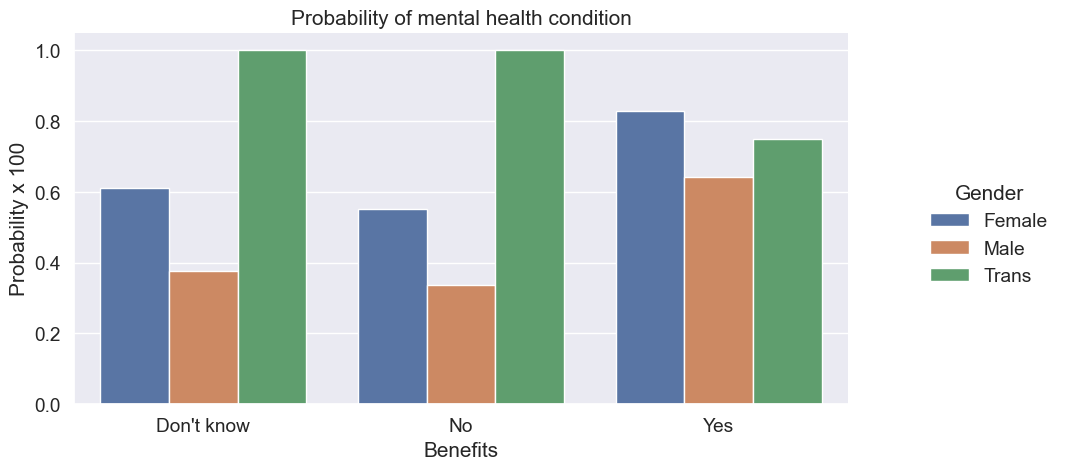

In [31]:
o = labelDict['label_benefits']
j = sns.factorplot(x="care_options", y="treatment", hue="Gender", data=df, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
j.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')
new_labels = labelDict['label_Gender']
for t, l in zip(j._legend.texts, new_labels): t.set_text(l)
j.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

C:\Users\khant\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\khant\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


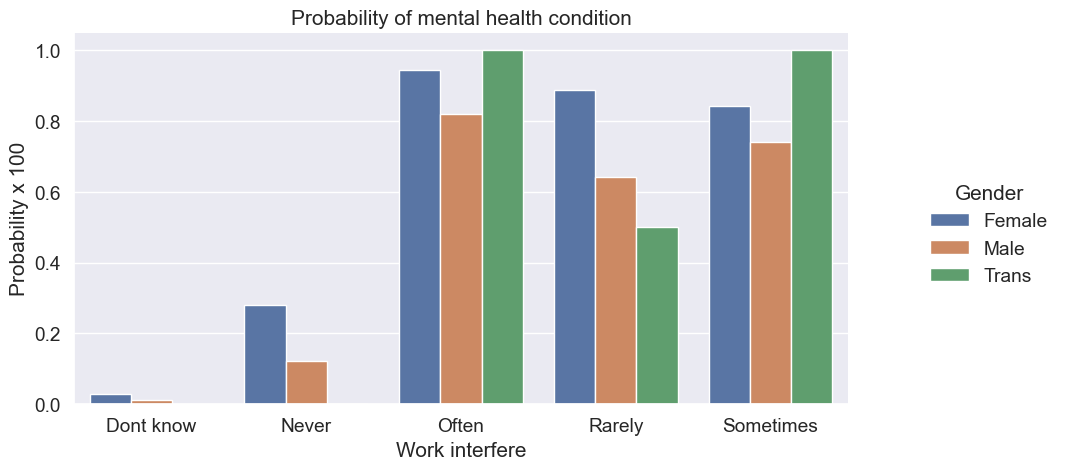

In [32]:
o = labelDict['label_work_interfere']
j = sns.factorplot(x="work_interfere", y="treatment", hue="Gender", data=df, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
j.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')
new_labels = labelDict['label_Gender']
for t, l in zip(j._legend.texts, new_labels): t.set_text(l)
j.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

In [33]:
# Scaling Age
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.422222,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.577778,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.311111,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.288889,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.288889,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


([<matplotlib.axis.XTick at 0x13989b0ae80>,
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Gender'),
  Text(2, 0, 'family_history'),
  Text(3, 0, 'benefits'),
  Text(4, 0, 'care_options'),
  Text(5, 0, 'anonymity'),
  Text(6, 0, 'leave'),
  Text(7, 0, 'work_interfere')])

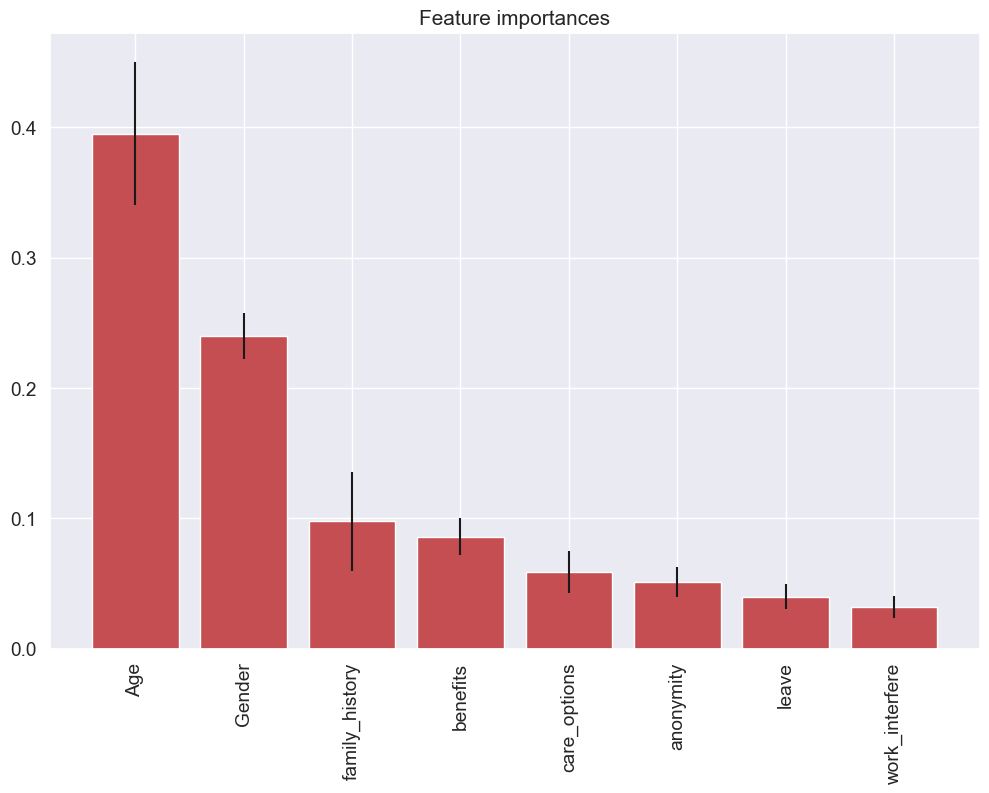

In [34]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = df[feature_cols]
y = df.treatment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')


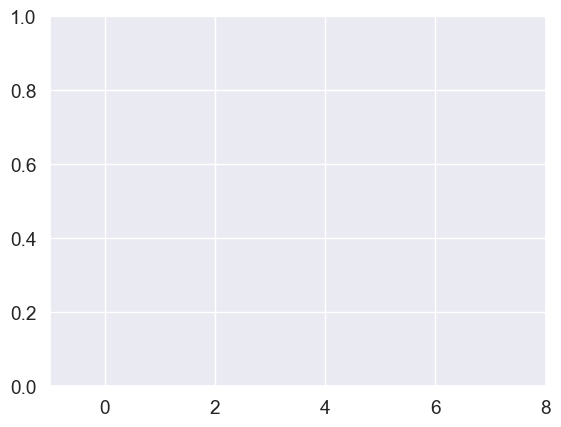

In [35]:
plt.xlim([-1, X.shape[1]])
plt.show()

In [36]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    # calculate accuracy
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    print('Null accuracy:n', y_test.value_counts())
    # calculate the percentage of ones
    print('Percentage of ones:', y_test.mean())
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean())
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    #Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    fp_rate = FP / float(TN + FP)
    print('False Positive Rate:', fp_rate)
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    # calculate cross-validated AUC
    print('Crossvalidated AUC values:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    print('First 10 predicted responses:n', model.predict(X_test)[0:10])
    print('First 10 predicted probabilities of class members:n', model.predict_proba(X_test)[0:10])
    model.predict_proba(X_test)[0:10, 1]
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    if plot == True:
        # histogram of predicted probabilities
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)
      
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    y_pred_prob = y_pred_prob.reshape(-1,1)
    y_pred_class = binarize(y_pred_prob,threshold=0.3)[0]
    print('First 10 predicted probabilities:n', y_pred_prob[0:10])
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    def evaluate_threshold(threshold):
       
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    return accuracy

In [37]:
def tuningCV(knn):
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [38]:
def tuningGridSerach(knn):
    
    k_range = list(range(1, 31))
    print(k_range)
   
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
   
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    
    grid.fit(X, y)
    grid.grid_scores_
    
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    grid_mean_scores1 = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    # plot the results
    plt.plot(k_range, grid_mean_scores1)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    # examine the best model
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)


In [39]:
def tuningRandomizedSearchCV(model, param_dist):
   
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_
   
    print('Rand1. Best Score: ', rand.best_score_)
    print('Rand1. Best Params: ', rand.best_params_)
   
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

In [40]:
def tuningMultParam(knn):
    
    k_Range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    param_grid = dict(N_neighbors=k_range, weights=weight_options)
    print(param_grid)
    
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y)
   
    print(grid.grid_scores_)
   
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)


In [41]:
def logisticRegression():
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred_class = logreg.predict(X_test)
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    #Data for final graph
    methodDict['Log. Regression'] = accuracy_score * 100

Accuracy: 0.7936507936507936
Null accuracy:n 1    190
0    188
Name: treatment, dtype: int64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Pred: [1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0]


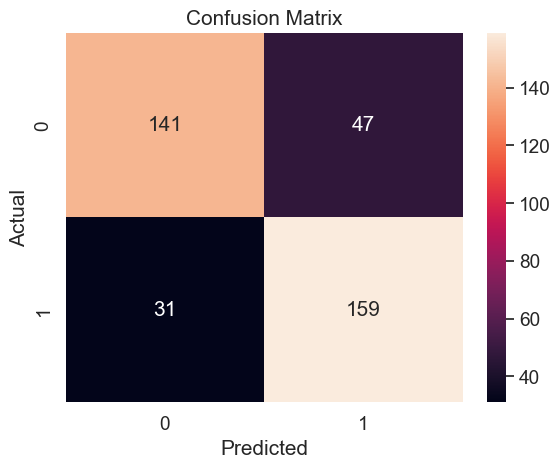

Classification Accuracy: 0.7936507936507936
Classification Error: 0.2063492063492064
False Positive Rate: 0.25
Precision: 0.7718446601941747
AUC Score: 0.793421052631579
Crossvalidated AUC values: 0.875624303447484
First 10 predicted responses:n [1 0 0 1 1 1 0 1 1 0]
First 10 predicted probabilities of class members:n [[0.08641078 0.91358922]
 [0.95799211 0.04200789]
 [0.96310597 0.03689403]
 [0.15276722 0.84723278]
 [0.40484477 0.59515523]
 [0.05562061 0.94437939]
 [0.79068384 0.20931616]
 [0.22630799 0.77369201]
 [0.48024933 0.51975067]
 [0.52666472 0.47333528]]
First 10 predicted probabilities:n [[0.91358922]
 [0.04200789]
 [0.03689403]
 [0.84723278]
 [0.59515523]
 [0.94437939]
 [0.20931616]
 [0.77369201]
 [0.51975067]
 [0.47333528]]


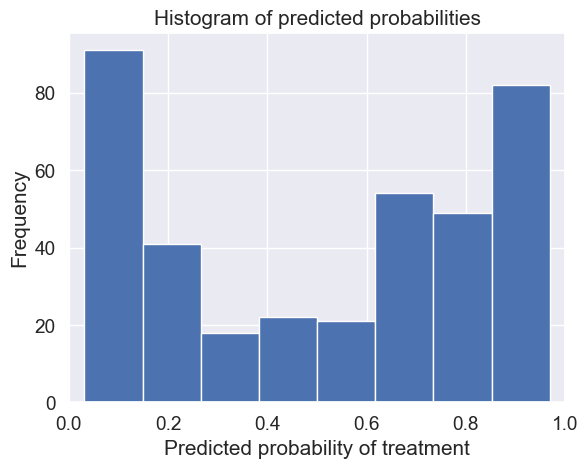

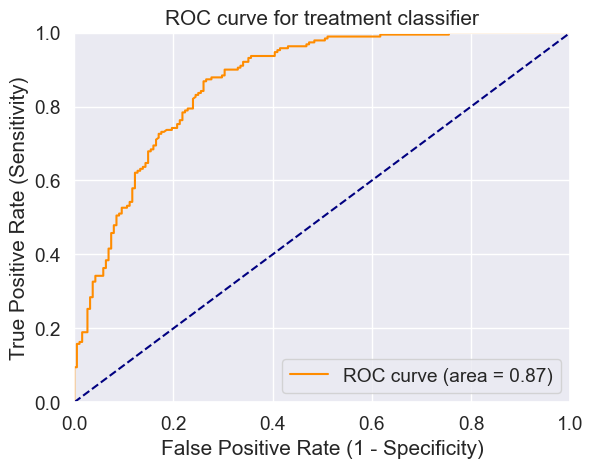

[[141  47]
 [ 31 159]]


In [49]:
logisticRegression()

In [42]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
   
    k_range = list(range(6, 31))
    weight_options = ['uniform', 'distance']
    
    param_dist = dict(N_neighbors=k_range, weights=weight_options)
    #tuningRandomizedSearchCV(knn, param_dist)
   
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
   
    y_pred_class = knn.predict(X_test)
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)
    #Data for final graph
    methodDict['K-Neighbors'] = accuracy_score * 100

Accuracy: 0.8015873015873016
Null accuracy:n 1    190
0    188
Name: treatment, dtype: int64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Pred: [1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0]


C:\Users\khant\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


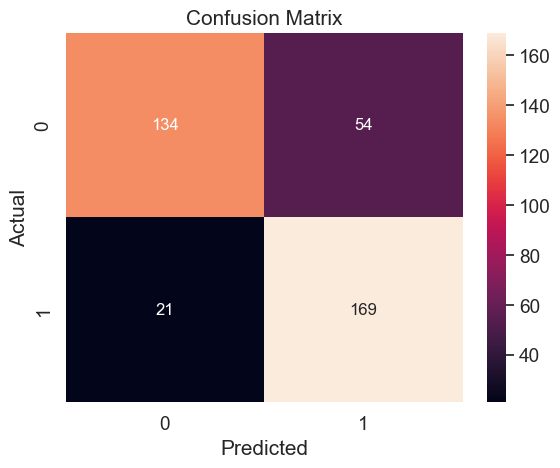

Classification Accuracy: 0.8015873015873016
Classification Error: 0.19841269841269837
False Positive Rate: 0.2872340425531915
Precision: 0.757847533632287
AUC Score: 0.8011198208286674
Crossvalidated AUC values: 0.879009320088549
First 10 predicted responses:n [1 0 0 1 1 1 0 1 1 1]
First 10 predicted probabilities of class members:n [[0.33333333 0.66666667]
 [1.         0.        ]
 [0.96296296 0.03703704]
 [0.22222222 0.77777778]
 [0.33333333 0.66666667]
 [0.07407407 0.92592593]
 [0.59259259 0.40740741]
 [0.2962963  0.7037037 ]
 [0.33333333 0.66666667]
 [0.37037037 0.62962963]]
First 10 predicted probabilities:n [[0.66666667]
 [0.        ]
 [0.03703704]
 [0.77777778]
 [0.66666667]
 [0.92592593]
 [0.40740741]
 [0.7037037 ]
 [0.66666667]
 [0.62962963]]


C:\Users\khant\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


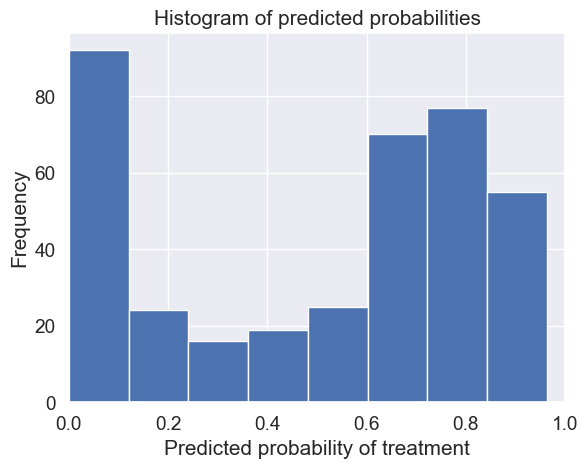

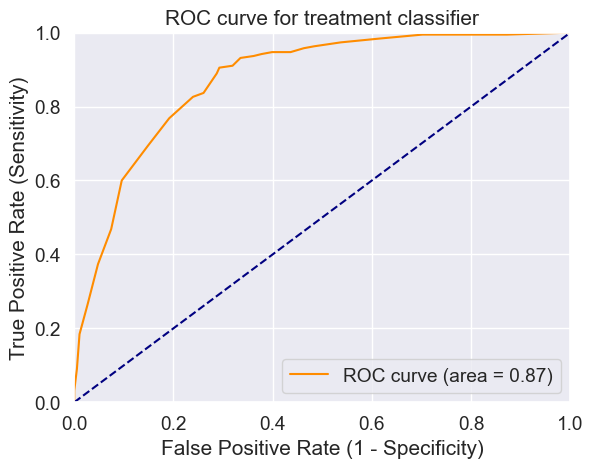

[[134  54]
 [ 21 169]]


In [51]:
Knn()


In [43]:
def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    y_pred_class = tree.predict(X_test)
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)
    #Data for final graph
    methodDict['Decision Tree Classifier'] = accuracy_score * 100


Rand1. Best Score:  0.8307746031746032
Rand1. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
[0.831, 0.812, 0.831, 0.829, 0.831, 0.829, 0.83, 0.831, 0.831, 0.831, 0.831, 0.828, 0.831, 0.828, 0.83, 0.827, 0.825, 0.831, 0.784, 0.831]
Accuracy: 0.8095238095238095
Null accuracy:n 1    190
0    188
Name: treatment, dtype: int64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Pred: [1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0]


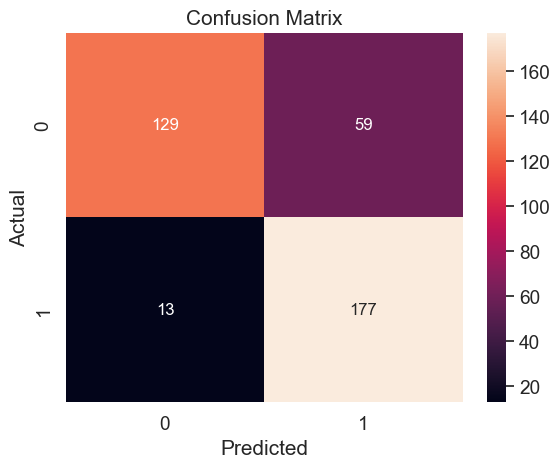

Classification Accuracy: 0.8095238095238095
Classification Error: 0.19047619047619047
False Positive Rate: 0.31382978723404253
Precision: 0.75
AUC Score: 0.8088745800671893
Crossvalidated AUC values: 0.8851039069675062
First 10 predicted responses:n [1 0 0 1 1 1 0 1 1 1]
First 10 predicted probabilities of class members:n [[0.15384615 0.84615385]
 [1.         0.        ]
 [0.97959184 0.02040816]
 [0.15384615 0.84615385]
 [0.40540541 0.59459459]
 [0.15384615 0.84615385]
 [0.90598291 0.09401709]
 [0.40540541 0.59459459]
 [0.09493671 0.90506329]
 [0.09493671 0.90506329]]
First 10 predicted probabilities:n [[0.84615385]
 [0.        ]
 [0.02040816]
 [0.84615385]
 [0.59459459]
 [0.84615385]
 [0.09401709]
 [0.59459459]
 [0.90506329]
 [0.90506329]]


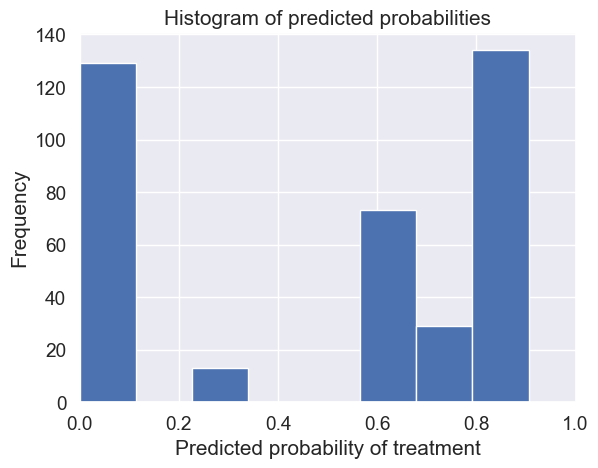

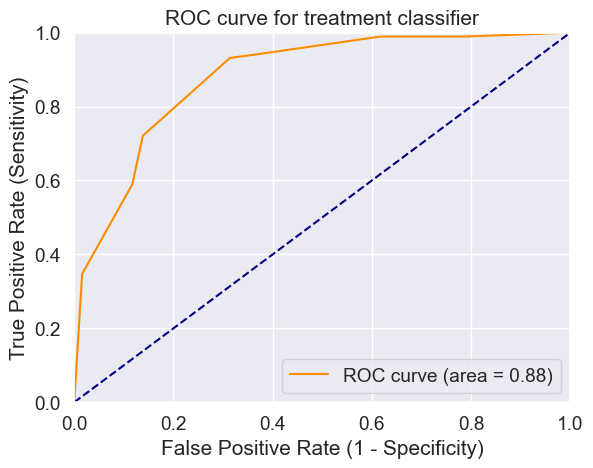

[[129  59]
 [ 13 177]]


In [53]:
treeClassifier()

In [44]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    y_pred_class = my_forest.predict(X_test)
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)
    #Data for final graph
    methodDict['Random Forest'] = accuracy_score * 100


Rand1. Best Score:  0.8307746031746032
Rand1. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
[0.831, 0.832, 0.832, 0.832, 0.831, 0.833, 0.831, 0.832, 0.832, 0.831, 0.831, 0.835, 0.831, 0.832, 0.831, 0.831, 0.832, 0.831, 0.831, 0.832]
Accuracy: 0.8068783068783069
Null accuracy:n 1    190
0    188
Name: treatment, dtype: int64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Pred: [1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0]


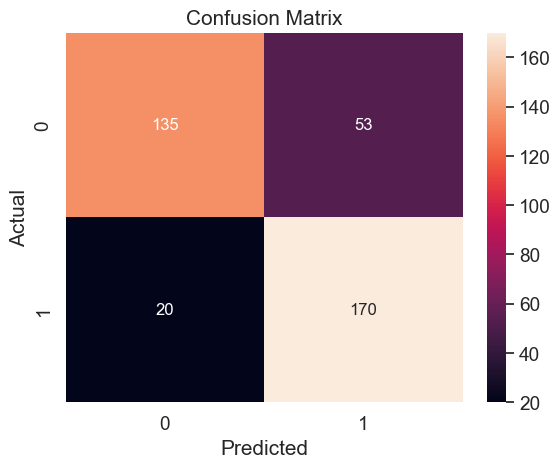

Classification Accuracy: 0.8068783068783069
Classification Error: 0.19312169312169314
False Positive Rate: 0.28191489361702127
Precision: 0.7623318385650224
AUC Score: 0.806410974244121
Crossvalidated AUC values: 0.8946500576036867
First 10 predicted responses:n [1 0 0 1 1 1 0 1 1 1]
First 10 predicted probabilities of class members:n [[0.25962307 0.74037693]
 [0.95816403 0.04183597]
 [0.94889141 0.05110859]
 [0.17458082 0.82541918]
 [0.49599248 0.50400752]
 [0.19242384 0.80757616]
 [0.82407912 0.17592088]
 [0.33402179 0.66597821]
 [0.24522251 0.75477749]
 [0.22786713 0.77213287]]
First 10 predicted probabilities:n [[0.74037693]
 [0.04183597]
 [0.05110859]
 [0.82541918]
 [0.50400752]
 [0.80757616]
 [0.17592088]
 [0.66597821]
 [0.75477749]
 [0.77213287]]


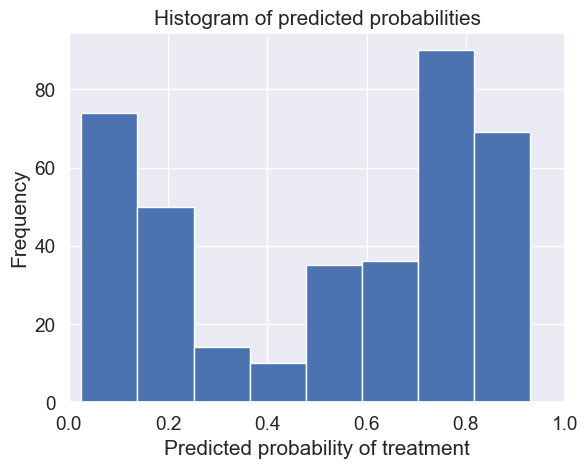

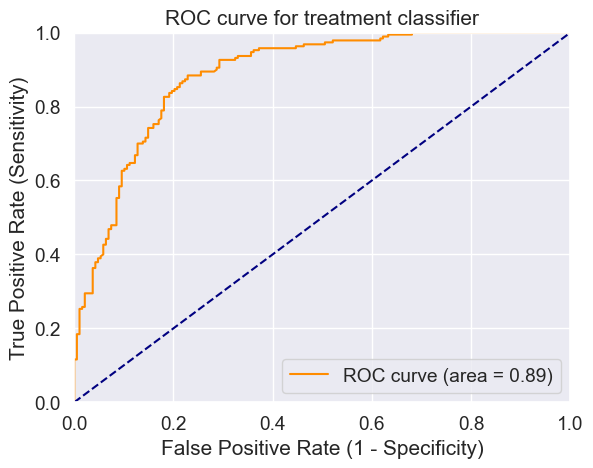

[[135  53]
 [ 20 170]]


In [55]:
randomForest()

In [45]:
def boosting():
    # Building and fitting
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train, y_train)
    y_pred_class = boost.predict(X_test)
    accuracy_score = evalClassModel(boost, y_test, y_pred_class, True)
    #Data for final graph
    methodDict['Boosting'] = accuracy_score * 100


Accuracy: 0.8201058201058201
Null accuracy:n 1    190
0    188
Name: treatment, dtype: int64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Pred: [1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0]


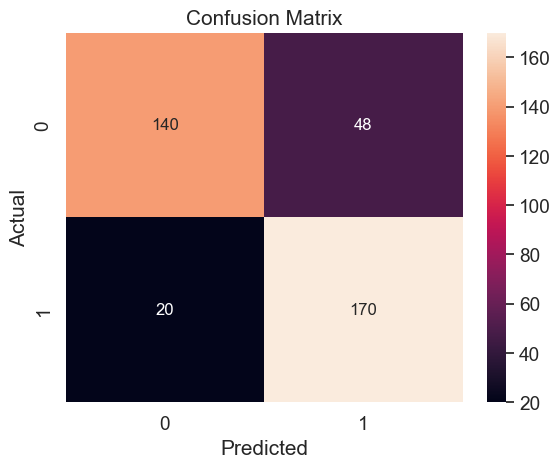

Classification Accuracy: 0.8201058201058201
Classification Error: 0.17989417989417988
False Positive Rate: 0.2553191489361702
Precision: 0.7798165137614679
AUC Score: 0.8197088465845466
Crossvalidated AUC values: 0.8759994258680175
First 10 predicted responses:n [1 0 0 1 1 1 0 1 1 1]
First 10 predicted probabilities of class members:n [[0.49894945 0.50105055]
 [0.50264838 0.49735162]
 [0.50277458 0.49722542]
 [0.49871224 0.50128776]
 [0.49997882 0.50002118]
 [0.49829491 0.50170509]
 [0.50073433 0.49926567]
 [0.49962303 0.50037697]
 [0.48646551 0.51353449]
 [0.49918549 0.50081451]]
First 10 predicted probabilities:n [[0.50105055]
 [0.49735162]
 [0.49722542]
 [0.50128776]
 [0.50002118]
 [0.50170509]
 [0.49926567]
 [0.50037697]
 [0.51353449]
 [0.50081451]]


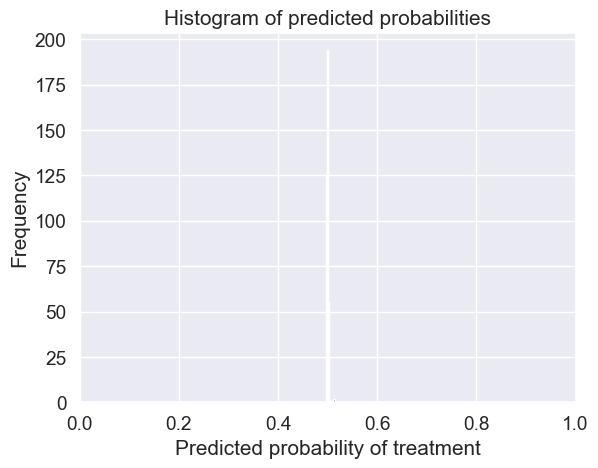

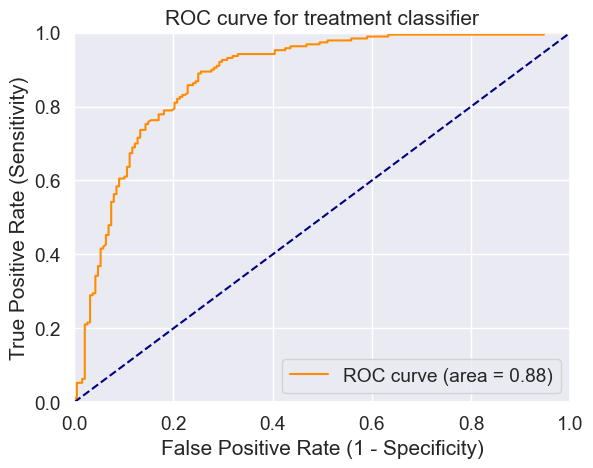

[[140  48]
 [ 20 170]]


In [57]:
boosting()

In [46]:

import tensorflow as tf
import argparse


In [47]:


batch_size = 100
train_steps = 1000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
def train_input_fn(features, labels, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    return dataset.shuffle(1000).repeat().batch(batch_size)
def eval_input_fn(features, labels, batch_size):
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)
    dataset = tf.data.Dataset.from_tensor_slices(inputs)
    dataset = dataset.batch(batch_size)
    # Return the dataset.
    return dataset


In [48]:
# Define Tensorflow feature columns
age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender")
family_history = tf.feature_column.numeric_column("family_history")
benefits = tf.feature_column.numeric_column("benefits")
care_options = tf.feature_column.numeric_column("care_options")
anonymity = tf.feature_column.numeric_column("anonymity")
leave = tf.feature_column.numeric_column("leave")
work_interfere = tf.feature_column.numeric_column("work_interfere")
feature_columns = [age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere]

In [67]:
pip install "tensorflow>=2.0.0"


Note: you may need to restart the kernel to use updated packages.


In [114]:
model = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                    hidden_units=[10, 10],
                                    optimizer=tf.keras.optimizers.legacy.SGD(learning_rate = 0.01,
                                momentum=0.0, 
                                nesterov=False, 
                                name='SGD'))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\khant\\AppData\\Local\\Temp\\tmp0epwcb88', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [115]:
model.train(input_fn=lambda:train_input_fn(X_train, y_train, batch_size), steps=train_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\khant\AppData\Local\Temp\tmp0epwcb88\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.77783996, step = 0
INFO:tensorflow:global_step/sec: 819.659
INFO:tensorflow:loss = 0.62908435, step = 100 (0.122 sec)
INFO:tensorflow:global_step/sec: 1515.17
INFO:tensorflow:loss = 0.61006445, step = 200 (0.066 sec)
INFO:tensorflow:global_step/sec: 1639.32
INFO:tensorflow:loss = 0.6145439, step = 300 (0.062 sec)
INFO:tensorflow:global_step/sec: 1565.63
INFO:tensorflow:loss = 0.54733694, step = 400 (0.063 sec)
INFO:tensorflow:global_step/sec: 1754.43
INFO:tensorflow:loss = 0.54811

In [116]:
# Evaluate the model.
eval_result = model.evaluate(
    input_fn=lambda:eval_input_fn(X_test, y_test, batch_size))
print('nTest set accuracy: {accuracy:0.2f}n'.format(**eval_result))
#Data for final graph
accuracy = eval_result['accuracy'] * 100
methodDict['Neural Network'] = accuracy

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-01-25T03:43:41
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\khant\AppData\Local\Temp\tmp0epwcb88\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.42256s
INFO:tensorflow:Finished evaluation at 2023-01-25-03:43:41
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.78571427, accuracy_baseline = 0.5026455, auc = 0.8654815, auc_precision_recall = 0.85270154, average_loss = 0.47232, global_step = 1000, label/mean = 0.5026455, loss = 0.47308606, precision = 0.7443946, prediction/mean = 0.5480554, recall = 0.8736842
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\khant\AppData\Local\Temp\tmp0epwcb88\model.ckpt-1000
nTest set accuracy: 0.79n


In [117]:
predictions = list(model.predict(input_fn=lambda:eval_input_fn(X_train, y_train, batch_size=batch_size)))
# Generate predictions from the model
template = ('nIndex: "{}", Prediction is "{}" ({:.1f}%), expected "{}"')
# Dictionary for predictions
col1 = []
col2 = []
col3 = []
for idx, input, p in zip(X_train.index, y_train, predictions):
    v  = p["class_ids"][0]
    class_id = p['class_ids'][0]
    probability = p['probabilities'][class_id] # Probability
    # Adding to dataframe
    col1.append(idx) # Index
    col2.append(v) # Prediction
    col3.append(input) # Expecter
    #print(template.format(idx, v, 100 * probability, input))
results = pd.DataFrame({'index':col1, 'prediction':col2, 'expected':col3})
results.head()

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\khant\AppData\Local\Temp\tmp0epwcb88\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


,index,prediction,expected
0,825,1,0
1,905,1,1
2,579,1,1
3,367,1,1
4,615,1,1


In [118]:
clf = AdaBoostClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)
# Write predictions to csv file
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
# Save to file
results.to_csv('results.csv', index=False)
results.head()

,Index,Treatment
0,5,1
1,494,0
2,52,0
3,986,1
4,186,0


In [119]:
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
results

,Index,Treatment
0,5,1
1,494,0
2,52,0
3,986,1
4,186,0
...,...,...
373,1024,1
374,506,0
375,1069,0
376,1125,1
